## Digit Recognizer

Based on the exercises in the https://www.datacamp.com/courses/deep-learning-in-python course and the https://www.kaggle.com/c/digit-recognizer competition. The purpose is to correctly classify each of the images, which represent handwritten digits, as as an integer between 0 and 9.

## Import Data and Exploratory Analysis

These lines load the packages and libraries that the rest of the code will use. Among these are Keras, a deep learning library for Python users, which runs on top of TensorFlow, a deep learning package developed by Google. I had to download and install both of these before my code would run.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Reshape
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [28]:
# Load the data
train1 = pd.read_csv("train1.csv")
train2 = pd.read_csv("train2.csv")
train3 = pd.read_csv("train3.csv")
train4 = pd.read_csv("train4.csv")

test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")
test3 = pd.read_csv("test3.csv")

train = train1.append(train2)
train = train.append(train3)
train = train.append(train4)

test = test1.append(test2)
test = test.append(test3)

In [29]:
# preview the train data, which represents the 784 pixels in each 28-pixel by 28-pixel image
train.head()

,Unnamed: 0,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# print the number of rows and columns in the dataframe
train.shape

(42000, 786)

## Separate for Validation

We separate the predictors and the labels at this point. This allow us to process the pixels separarely before we fit the model to the target.

In [5]:
# include all of the data except the target/label column in X_train
X_train = train.drop(labels = ["label"],axis = 1)
Y_train = train["label"]

## Distribution

The values 0 through 9 are distributed fairly evenly through the target. This means the data is balanced, which will make it easier for the classification model to do its job.

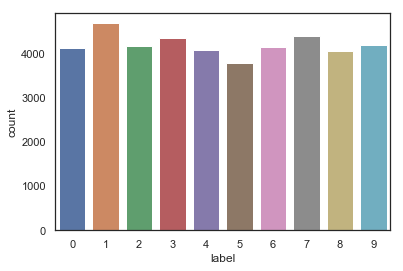

In [6]:
sns.set(style='white', context='notebook', palette='deep')
g = sns.countplot(Y_train)

## Normalization

This process makes it easier for us to train the deep learning model. There are 255 values for grayscale images, with 0 equal to black and 255 equal to white. Dividing each pixel in the images by 255 yields a number between 0 and 1, so that none of the features in the data will start out with too much influence upon the model.

In [7]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

## Reshaping

The reshaping is required so that the model can visualize the images in more than one dimension. This allows the model to detect various patterns in the pictures, such as the lines and curves that show up in certain numbers. Keras requires an additional dimension for channels, but we only need one chanel because our images have been converted to grayscale.

In [8]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

## One Hot Encoding

This line of code uses a method from Keras to transform each digit in the target column into ones and zeroes spread over 10 new target columns. For instance, if the digit is 2, the 10 target columns will contain the following vector: [0,0,1,0,0,0,0,0,0,0]

In [9]:
# Encode labels to one hot vectors
Y_train = to_categorical(Y_train, num_classes = 10)

## Split for Model

This process splits the data into training and validation. This split allow us to find the sweetspot for our model. In other words, it helps us to avoid underfitting and overfitting.

In [10]:
# Set the random seed
random_seed = 2

In [11]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

## Image Sample

This code randomly selects a row from the training data. It convert the vector of 784 pixels into a 28-pixel by 28-pixel square photo. It displays the image in grayscale.

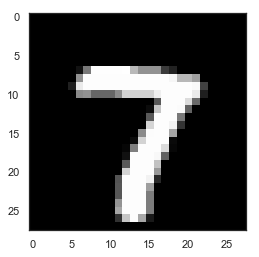

In [12]:
# Display the image for a randomly selected observation in the predictors data
num = random.randint(0,42000)
sample_image = plt.imshow(X_train[num][:,:,0],cmap='gray')

## Add Layers to Model

These lines of code build the model with methods from Keras. The model will contain a convolutional neural network. We add a series of layers (input, hidden, and output) to the model. The Conv2D layers contain a kernal size that specifies the size of the "window" that will pass over each image, looking for patterns that can correlated with specific digits. The ReLU activation function is nonlinear because it allows us to keep positive values and replace negative values with zeroes. The MaxPool2D layer finds the highest values within defined spaces. The BatchNormalization layer rescales the weights the model has learned to improve the training time. The Dropout layer provides regularization, and avoids overfitting, by randomly removing a percentage of nodes from the model. The Flatten layer removes all but one of the dimensions of the data. Near the end of the model are a couple of Dense layers, which are characterized by having every node receive input from every node in the prior layer. The final layer is given 10 outputs and a Softmax activation so it can calculate a probability distribution for any given image over the 10 possible digits.

In [13]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(784, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Model Compiling

These lines of code launch the RMSProp optimizer from Keras. We can specify the initial learning rate, which the model uses to determine the speed at which it will step through the multi-dimensional gradient to find an optimal solution. The rho, epsilon, and decay parameters also help determine the adaptive learning rate. The goal is to find significant valleys in the gradient that the model can descend to minimize its error rate. The loss function selected is ideal for classification projects, where the target values fall within a range of specified values. The accuracy metric allow us to see the accuracy score during the model fitting process. The model must be compiled with most of these parameters we can fit it to the data.

In [14]:
# Define the optimizer
optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)

In [15]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## Learning Rate Reduction

This monitor, available from Keras, reduces the learning rate for the model fitting process when the values for validation accuracy or loss hasn't improved for a specified number of epochs. Ideally, each epoch witnesses and increase in accuracy and a decline in loss each epoch. Each epoch is simply a pass through a batch of observations in the image data. Using a patience value of 2 or 3 is generally recommended. The factor determines the percentage by which the learning rate will be reduced during each update. The verbose parameter controls whether the model prints preliminary results during the fitting process. The monitor also has a minimum learning rate, so that the size of the steps toward gradient descent remain greater than or equal to a certain amount.

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001)

In [17]:
epochs = 35 
batch_size = 1400 
steps_per_epoch = X_train.shape[0] // batch_size

## Augmentation

This is a method for slightly transforming images, which helps us to avoid overfitting. These movements occur in random amounts, up to certain limits. The rotations are no more than 10 degrees, the zooming is no more than 10 percent, and the shifts (horizontal and vertical) are no more than 10 percent. The idea is to teach the model how to recognize handwritten digits in a wider range of sizes and positions than would otherwise be available in the regular training data.

In [18]:
datagen = ImageDataGenerator(rotation_range=10, zoom_range = 0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(X_train)

## Model Fitting

During this process, the learning rate controls the rate of gradient descent as the model searches for minimum values. These values help the model to find optimized weights on the paths that connect nodes from adjacent layers. The weights and the input values are combined in a calculation that determines the node values in the first hidden layer, with a similar interaction occuring between weights and nodes for each subsequent layer. The iterations during the fitting process will also print a few values for each epoch: a loss value on the predictors not in validation, an accuracy score for the predictors not in validation, a validation loss on the predictors in validation, and a validation accuracy score for the predictors in validation.

In [19]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size), epochs = epochs, 
                              validation_data = (X_val,Y_val), steps_per_epoch = steps_per_epoch, 
                              callbacks=[learning_rate_reduction]) 

Instructions for updating:
Use tf.cast instead.
Epoch 1/35
27/27 [==============================] - 134s 5s/step - loss: 1.6699 - acc: 0.5080 - val_loss: 0.2667 - val_acc: 0.9110
Epoch 2/35
27/27 [==============================] - 130s 5s/step - loss: 0.4223 - acc: 0.8687 - val_loss: 0.1068 - val_acc: 0.9667
Epoch 3/35
27/27 [==============================] - 127s 5s/step - loss: 0.2037 - acc: 0.9377 - val_loss: 0.0787 - val_acc: 0.9752
Epoch 4/35
27/27 [==============================] - 125s 5s/step - loss: 0.1499 - acc: 0.9531 - val_loss: 0.0528 - val_acc: 0.9831
Epoch 5/35
27/27 [==============================] - 124s 5s/step - loss: 0.1074 - acc: 0.9674 - val_loss: 0.0406 - val_acc: 0.9879
Epoch 6/35
27/27 [==============================] - 125s 5s/step - loss: 0.0772 - acc: 0.9760 - val_loss: 0.0428 - val_acc: 0.9852
Epoch 7/35
27/27 [==============================] - 125s 5s/step - loss: 0.0810 - acc: 0.9754 - val_loss: 0.0321 - val_acc: 0.9917
Epoch 8/35
27/27 [=================

## Prepare for Kaggle Submission

These lines of code use the model to prepare predictions for each observation in the test data. We then generate index numbers, starting at 1, equal to the number of test observations. Together, these two series are saved, with specific names attached, as a single csv file. These are the specifications required for submission files to the Kaggle competition.

In [20]:
# predict results for the test data
results = model.predict(test)

In [21]:
# get the number of rows from the dimensions of the results data, which is based on the rows in the test data
rows = results.shape[0]

In [22]:
# Out of the 10 target columns, select the one with the highest value, which indicates the predicted digit 
results = np.argmax(results,axis = 1)

In [23]:
# convert those predictions into a Pandas series titled "Label"
results = pd.Series(results,name="Label")

In [24]:
# combine a list of index numbers from 1 to 28,000 with the "Label"
submission = pd.concat([pd.Series(range(1,rows+1),name = "ImageId"),results],axis = 1)

In [25]:
# turn the labels and index numbers into a csv file that can be submitted to Kaggle
submission.to_csv("submission.csv",index=False)

In [26]:
print("The submission file has been saved to the same folder as this program.")

The submission file has been saved to the same folder as this program.
